<a href="https://colab.research.google.com/github/nematatu/Colab-Python/blob/master/Fashion%20MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.14.0


In [4]:
#pip install --upgrade keras

In [5]:
#mnist(エムにスト)=Modified National Institute Standard and Technology database
fashion_mnist=tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [6]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [7]:
#.shapeはnumpy形式のデータに対して使える
#データセットの形式を表示できる
#60000個のデータが存在し、画像サイズは28x28
train_images.shape

(60000, 28, 28)

In [8]:
#ラベル数も当然60000
len(train_labels)

60000

In [9]:
#それぞれラベルは0-9の整数
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
#テストデータも同様
print(test_images.shape)
len(test_labels)

(10000, 28, 28)


10000

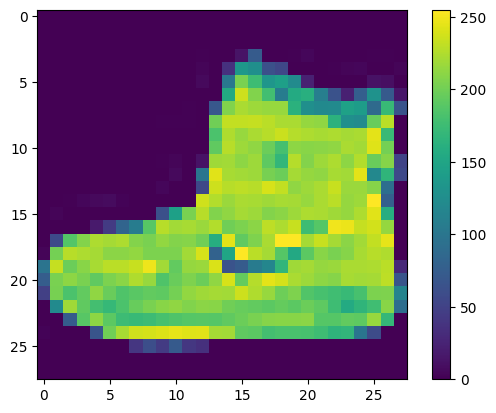

In [11]:
#データの前処理
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
#以下のようにすることで、上の画像のピクセルの最大値が出てくる。
#つまり、ピクセルの幅がわかる。
print(train_images[0].max())

255


In [13]:
#0-255のピクセルの範囲の画像を0-1にスケーリングする
train_images=train_images/255.0
test_images=test_images/255.0

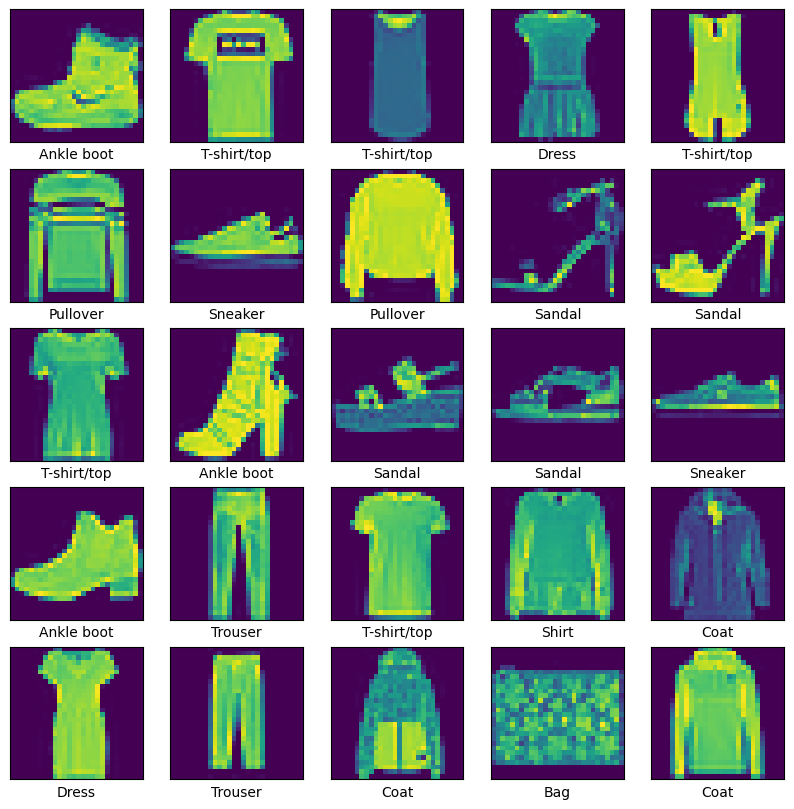

In [14]:
#train_dataを表示してみる
plt.figure(figsize=(10,10))
for i in range(25):
  #5x5の枠を作って、そのうちi+1個目になんかするよ
  plt.subplot(5,5,i+1)
  #x軸とy軸の目盛りを消す
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  #plt.cm.binaryで、cmp(カラーマップ)を指定
  #グレースケールのカラーマップで、0が黒、1が白
  #viridisは青が低く、黄色が高い値を示す
  plt.imshow(train_images[i],cmap=plt.cm.viridis)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [15]:
#レイヤー作るで〜！
#tf.keras.Sequentialでモデルのレイヤーを定義
model=tf.keras.Sequential([
    #Flattenで、n次元配列を一次元にデータのフォーマットをする
    #具体的には、(28,28)の二次元で格納されていたデータを、28x28=784の一次元の配列にフォーマットする
    #機械学習においては一般的だそうで、シンプルにデータを扱えるのが利点とのこと
    tf.keras.layers.Flatten(input_shape=(28,28)),
    #↑が入力層に対し、↓のDenseが中間層としての役割を持つ
    #128個のノードを持ってて、活性化関数にreluを使う
    #relu: 0以下なら0を、0以上ならその値を返す関数
    #要は、マイナスは切り捨てるで〜ってやつ
    tf.keras.layers.Dense(128,activation="relu"),
    #Denseが出力層としての役割になってる
    #10個の配列を返すよ
    tf.keras.layers.Dense(10)
])

In [16]:
#モデルのコンパイル(学習過程の設定)をするぞ〜！
model.compile(
    #オプティマイザー: モデルのパラメータを最適な状態に更新するための手法
    #具体的には、adamの場合、最初は学習率が高くてどんどん学習していくけど、
    #次第に学習率が落ちて、適度に調整しながら、小さい学習率で進んでいく
    #x:optimazer o:optimizer
    optimizer='adam',
    #損失関数: モデルの予測が正解とどれだけ離れているかを測定
    #from_logits=Trueとすることで、ロジット（ソフトマックス関数を適応する前の出力。今回だと、上のセルの出力そのまま）に損失関数を適応
    #また、損失関数内部でソフトマックス関数を行う
    #tf.keras.lossesをつける
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    #指標を示している
    #accuracyで、精度を指標に頑張ってもらう
    metrics=['accuracy']
)

In [17]:
#train_imagesを使ってモデルをトレーニングするぞ〜！
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.4960 - accuracy: 0.8273
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3751 - accuracy: 0.8640
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3365 - accuracy: 0.8772
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3140 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2953 - accuracy: 0.8920
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2824 - accuracy: 0.8947
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2710 - accuracy: 0.8996
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2611 - accuracy: 0.9034
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2501 - accuracy: 0.9074
Epoch 10/10
1875/1875 [==============================] - 10s 6ms/step - los

In [18]:
#model.evaluate()でモデルの性能の指標を得られる
#accuracyがこのとき低くなっているのは、過学習によるものらしい
#詳しくはわからん
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=1)
print('\nTest Accuracy',test_acc)
print('\nTest Loss',test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.3482 - accuracy: 0.8789

Test Accuracy 0.8788999915122986

Test Loss 0.34820544719696045


In [19]:
#元のmodelを土台に、Softmax関数を追加してる
#Softmax関数: よくわからんけど合計が1になるような確率分布に変換してるらしい
probability_model=tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [20]:
#学習したモデルを使ってtest_imagesを予測する
#予測っていい方がわかりにくい
#普通に学習したものを使って当ててるだけ
predictions=probability_model.predict(test_images,verbose=1)


313/313 [==============================] - 1s 2ms/step


In [21]:
#一個一個みていこうぜ
#確信度を表してる
predictions[0]

array([7.7860629e-10, 1.7234897e-10, 1.5435890e-10, 3.6649538e-11,
       1.8380296e-09, 3.9798551e-04, 2.4200986e-09, 4.9301323e-02,
       3.6204035e-08, 9.5030063e-01], dtype=float32)

In [22]:
#最も確信度が高いラベルは？
np.argmax(predictions[0])

9

In [23]:
#グラフ化しようぜ
def plot_image(i,predictions_array,true_label,img):
  true_label,img=true_label[i],img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  #plt.imshow()で画像を表示
  #cmap=plt.cm.binaryで、カラーマップを白黒にしてる
  plt.imshow(img,cmap=plt.cm.binary)

  #最も確信度が高い数値のargment(添字)を代入
  predicted_label=np.argmax(predictions_array)
  #予想したラベルともともとのラベルを比較する
  if predicted_label==true_label:
    color='blue'
  else:
    color='red'
  #フォーマット文字列
  #{:a.bf}とすることで、該当する浮動小数点を含む数値をフォーマットする
  #具体的には、整数a桁、小数b桁で表す
  #例えば、95.036484…と続く数字を整数2桁、小数1桁で表示させたいとき、
  #{:2.1f}とすることで可能
  plt.xlabel("{}{:2.2f}% ({})".format(class_names[predicted_label],100*np.max(predictions_array),class_names[true_label]),color=color)

def plot_value_array(i,predictions_array,true_label):
    true_label=true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    plt.ylim([0,1])

    print(predictions_array)

    #確率が高いとでたindexを代入する
    predicted_label=np.argmax(predictions_array)
    #グラフのバーの設定する
    thisplot=plt.bar(range(10),predictions_array,color='#777777')
    #predictions_array配列に入っているindex番目の値をグラフに適応
    #色もね
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


In [24]:
# for label in test_labels:
#   print(label)

[7.7860629e-10 1.7234897e-10 1.5435890e-10 3.6649538e-11 1.8380296e-09
 3.9798551e-04 2.4200986e-09 4.9301323e-02 3.6204035e-08 9.5030063e-01]


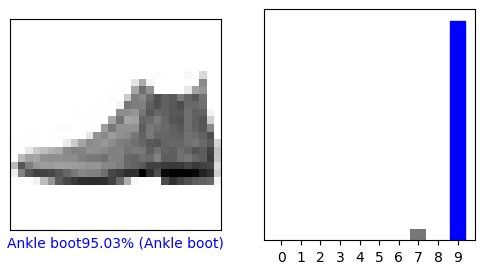

In [25]:
i=0
#figsize=(x,y)で横x、縦yの大きさの図を作る
plt.figure(figsize=(6,3))
#1行2列の配置を作って、その1番目になんかするよ
plt.subplot(1,2,1)
#predictions[i]: 予想したいもの
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

[1.7850977e-07 6.1468747e-10 5.7308613e-10 8.8687244e-09 1.2434455e-08
 1.9378679e-01 3.1112105e-08 1.0319051e-02 7.9589325e-01 6.3809983e-07]


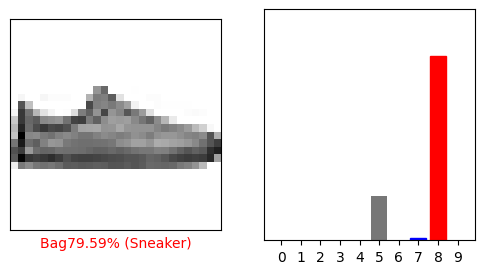

In [26]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

[7.7860629e-10 1.7234897e-10 1.5435890e-10 3.6649538e-11 1.8380296e-09
 3.9798551e-04 2.4200986e-09 4.9301323e-02 3.6204035e-08 9.5030063e-01]
[1.3036010e-05 4.7392967e-14 9.9964058e-01 1.6855751e-12 2.1358982e-04
 2.3621735e-11 1.3274697e-04 8.3539743e-14 1.4099393e-08 8.0033771e-15]
[3.7474411e-08 9.9999994e-01 6.6130647e-12 1.5404324e-09 4.1962103e-10
 2.7333116e-19 1.7402810e-11 1.8309275e-25 2.5006525e-11 1.6904376e-20]
[1.3285491e-07 9.9999803e-01 1.3737892e-09 1.7408682e-06 1.7610095e-08
 1.4421087e-14 2.7885170e-09 5.8954939e-20 8.5163138e-10 1.7203636e-15]
[2.6849094e-01 1.0185562e-07 3.3115812e-02 1.1387796e-03 1.1619689e-03
 5.3597336e-07 6.9604701e-01 6.9337793e-06 3.7851718e-05 1.6912754e-08]
[3.3368604e-05 9.9996620e-01 9.6060191e-09 6.8670147e-08 4.1502101e-08
 2.5200623e-13 1.5495628e-07 4.2937415e-21 2.6276664e-10 9.2303815e-15]
[2.4183323e-06 5.9448400e-08 3.1437248e-04 2.0167860e-08 9.9929810e-01
 9.7986771e-11 3.8509327e-04 3.9481081e-13 4.0686150e-08 8.4816704e-10]

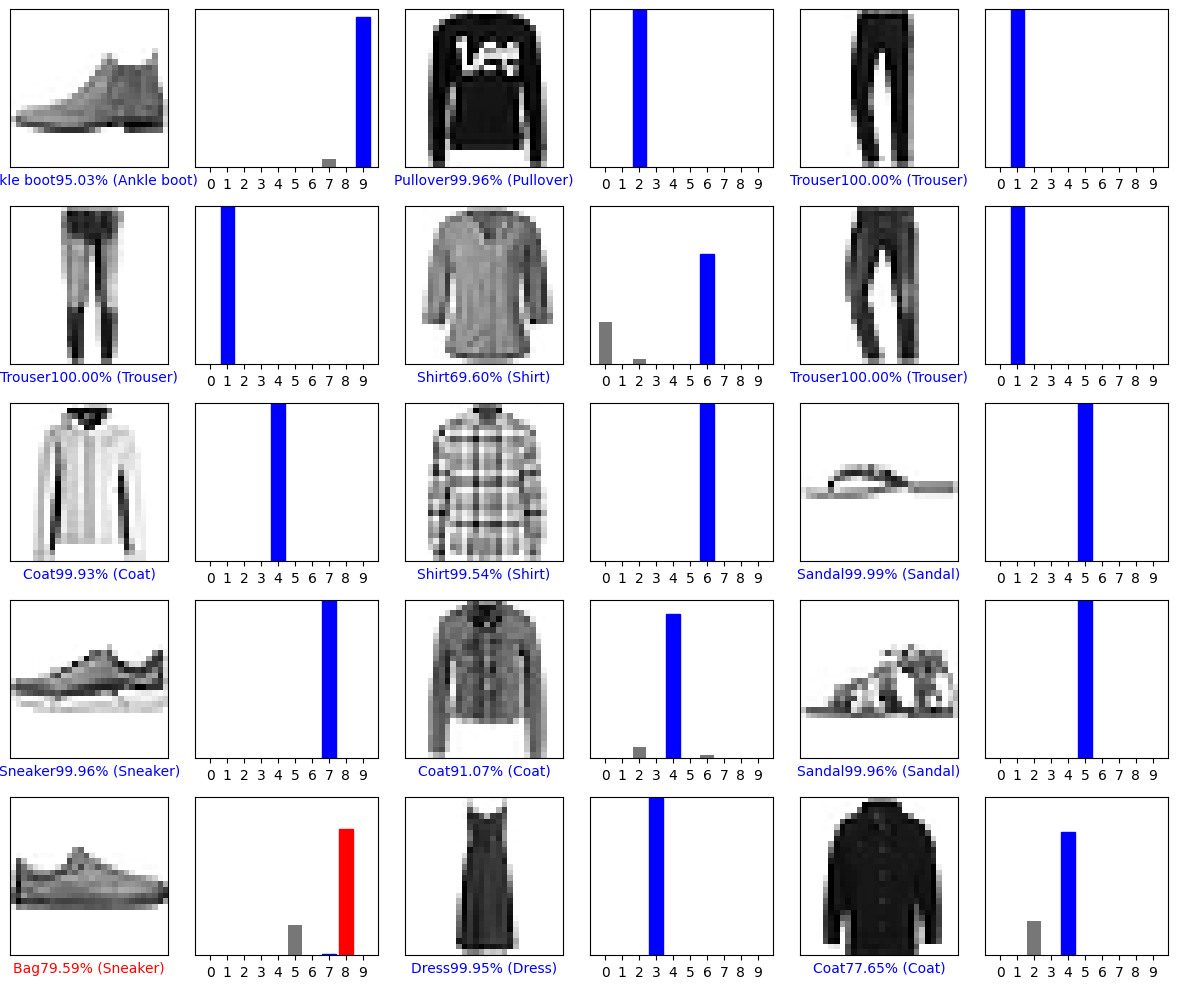

In [27]:
num_rows=5
num_cols=3
num_images=num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_image(i,predictions[i],test_labels,test_images)
  plt.subplot(num_rows,2*num_cols,2*i+2)
  plot_value_array(i,predictions[i],test_labels)
plt.tight_layout()
plt.show()

In [28]:
img=test_images[1]
print(img.shape)
#np.expand_dims():次元を追加　？？の状態
img=(np.expand_dims(img,0))
print(img.shape)

(28, 28)
(1, 28, 28)


In [29]:
predictions_single=probability_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 25ms/step
[[1.3036023e-05 4.7392967e-14 9.9964058e-01 1.6855751e-12 2.1359023e-04
  2.3621735e-11 1.3274697e-04 8.3539424e-14 1.4099339e-08 8.0033467e-15]]


In [35]:
#何が違うん
predictions_test=probability_model.predict(test_images)
predictions_test[1]

313/313 [==============================] - 2s 5ms/step


array([1.3036010e-05, 4.7392967e-14, 9.9964058e-01, 1.6855751e-12,
       2.1358982e-04, 2.3621735e-11, 1.3274697e-04, 8.3539743e-14,
       1.4099393e-08, 8.0033771e-15], dtype=float32)

[1.3036023e-05 4.7392967e-14 9.9964058e-01 1.6855751e-12 2.1359023e-04
 2.3621735e-11 1.3274697e-04 8.3539424e-14 1.4099339e-08 8.0033467e-15]


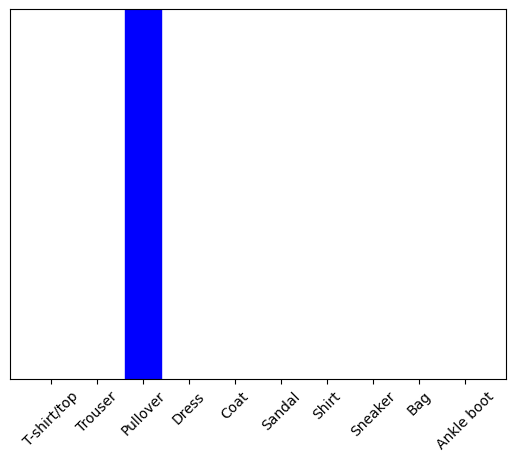

In [37]:
#グラフ化
plot_value_array(1,predictions_single[0],test_labels)
_=plt.xticks(range(10),class_names,rotation=45)
plt.show()